In [1]:
from functions import coordinates_change

In [2]:
import global_land_mask
from global_land_mask import globe
def globus(simulated_coordiante):
  '''Returns if a coordinate is in land or not'''
  return globe.is_land(*simulated_coordiante)

In [ ]:
pip install basemap

In [4]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
import geopandas as gpd
from global_land_mask import globe
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon
from sklearn.neighbors import KernelDensity
from scipy.stats import entropy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

In [5]:
from GSPTDataset import GSPTDataset
gspt = GSPTDataset(data_path="Global-Steel-Plant-Tracker-2023-03-2.xlsx",
                        missing_years_path="filled_missing_start_years.xlsx",
                        version_year=2023,
                        gspt2gspt_path="GSPT2GSPT.json")

In [6]:
'''Database with operating steel plants in 2019'''
df_gspt= gspt.get_operating_plants(start_year=2019,melt=True)
df_gspt=df_gspt.drop_duplicates(["Coordinates"])


c:\Users\Denisa.draghia\Desktop\Acier\GSPTDataset.py:538: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  steel_df[[c.replace("date", "year") for c in date_cols]] = steel_df.loc[:, date_cols].applymap(extract_year, na_action="ignore")


In [7]:
df_gspt['Region'].unique()

array(['Africa', 'Asia Pacific', 'Central & South America', 'Eurasia',
       'Europe', 'Middle East', 'North America'], dtype=object)

In [8]:
def land_reference_subunit(long_min, long_max, lat_min, lat_max, step):
    '''Takes the limit coordinates of an area and creates a grid that specifies
      whether the points is in land or not'''
    xgrid=np.arange(long_min, long_max,step) #longitude
    ygrid=np.arange(lat_min, lat_max, step) #latitude
    tuples_coordinates = list(itertools.product(ygrid,xgrid))
    number_of_tuples=int((long_max-long_min)/step)
    latitude_lines = [tuples_coordinates[i:i + number_of_tuples] for i in range(0, len(tuples_coordinates), number_of_tuples)]
    latitude_lines=np.array(latitude_lines)
    Z1=[]

    for i in range(latitude_lines.shape[0]):
        Z1.append(np.array(list(map(globus, latitude_lines[i]))))

    Z1_array = np.array(Z1)
    land_reference= Z1_array.astype(int)
    land_reference_99 = [[-9999 if x == 0 else x for x in row] for row in land_reference]
    return np.array(land_reference_99)

In [10]:
def construct_grid(long_min, long_max, lat_min, lat_max, step):
    xgrid=np.arange(long_min, long_max,step)
    ygrid=np.arange(lat_min, lat_max, step)
    return xgrid, ygrid

In [ ]:
south_am=land_reference_subunit(-95,-34,-56,24, 0.05)
xgrid,ygrid=construct_grid(-95,-34,-56,24, 0.05)

In [62]:
afr=land_reference_subunit(-18,51,-35,38, 0.05)
xgrid,ygrid=construct_grid(-18,51,-35,38, 0.05)

In [11]:
europe=land_reference_subunit(-10,60,31,70,0.05)
xgrid,ygrid=construct_grid(-10,60,31,70,0.05)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

# Define the parameter grid for bandwidth values
param_grid = {'bandwidth': np.linspace(0.001, 1, 1000)}

# Create the KDE estimator
kde = KernelDensity(metric='haversine',kernel='exponential')
X=np.radians(coordinates_change(df_gspt[df_gspt["Region"]=='Europe']))
# Perform grid search with cross-validation
grid_search = GridSearchCV(kde, param_grid, cv=10, scoring='neg_log_loss')
grid_search.fit(X)  # X is your data

# Get the best bandwidth parameter
best_bandwidth = grid_search.best_params_['bandwidth']


In [38]:
kde = KernelDensity(bandwidth=0.001
                    , metric='haversine',kernel='exponential')
kde.fit(np.radians(coordinates_change(df_gspt[df_gspt["Region"]=='Europe'])))
kde.score_samples(np.array([[ 1.22085781, -0.17104227],
       [ 1.22085781, -0.1701696 ]]))

c:\Users\Denisa.draghia\Desktop\Acier\functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['latitude', 'longitude']] = data['Coordinates'].str.split(',',expand=True)
c:\Users\Denisa.draghia\Desktop\Acier\functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['latitude', 'longitude']] = data['Coordinates'].str.split(',',expand=True)
c:\Users\Denisa.draghia\Desktop\Acier\functions.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

array([-159.90012514, -159.60619961])

c:\Users\Denisa.draghia\Desktop\Acier\functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['latitude', 'longitude']] = data['Coordinates'].str.split(',',expand=True)
c:\Users\Denisa.draghia\Desktop\Acier\functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['latitude', 'longitude']] = data['Coordinates'].str.split(',',expand=True)
c:\Users\Denisa.draghia\Desktop\Acier\functions.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

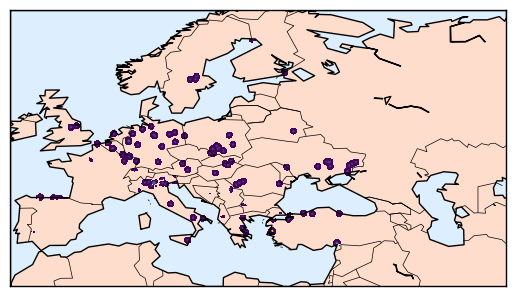

In [65]:




X, Y = np.meshgrid(xgrid, ygrid[::-1])

land_mask = (europe> -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])

# Create two side-by-side plots
fig, ax = plt.subplots(1, 1)

    # plot coastlines with basemap
m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                urcrnrlat=Y.max(), llcrnrlon=X.min(),
                urcrnrlon=X.max(), resolution='c')
m.drawmapboundary(fill_color='#DDEEFF')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color="#FFDDCC")

    # construct a spherical kernel density estimate of the distribution
kde = KernelDensity(bandwidth=0.001, metric='euclidean',kernel='exponential')
kde.fit(np.radians(coordinates_change(df_gspt[df_gspt["Region"]=='Europe'])))


    # evaluate only on the land: -9999 indicates ocean
Z = np.full(land_mask.shape[0], -9999)
Z[land_mask] = np.exp(kde.score_samples(xy))
Z = Z.reshape(X.shape)

    # plot contours of the density
levels = np.linspace(0, Z.max(), 50)
ax.contourf(X, Y, Z,levels=levels,cmap='viridis')


In [61]:
Z.max()

0

In [28]:
def plot_density(continent, noyau, h):
    continent_coordinates = {'Europe':(-10,60,31,70), 'Africa': (-18,51,-35,38),
                             'Central & South America':(-95,-34,-56,24, 0.05)}
    coordinates= continent_coordinates[continent]
    long_min, long_max, lat_min, lat_max=coordinates
    xgrid,ygrid=construct_grid(long_min, long_max, lat_min, lat_max,0.05)
    cont=land_reference_subunit(long_min, long_max, lat_min, lat_max,0.05)
    X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
    land_mask = (cont[::5,::5]> -9999).ravel()
    xy = np.vstack([Y.ravel(), X.ravel()]).T
    xy = np.radians(xy[land_mask])
    fig, ax = plt.subplots(1, 1)
    m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                urcrnrlat=Y.max(), llcrnrlon=X.min(),
                urcrnrlon=X.max(), resolution='c')
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    m.drawcountries()
    kde = KernelDensity(bandwidth=h, metric='haversine',kernel=noyau)
    kde.fit(np.radians(coordinates_change(df_gspt[df_gspt["Region"]==continent])))

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999)
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 50)
    ax.plot(X, Y, Z,levels=levels)

In [308]:
continent_coordinates = {'Europe':(-10,60,31,70), 'Africa': (-18,51,-35,38),'Central & South America':(-95,-34,-56,24, 0.05)}
l1,l2,L1,L2= continent_coordinates['Europe']